In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000)

/Users/glebradchenko/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Reading CSV and setting timeseries as index

In [3]:
#read CSV file
df=pd.read_csv('../data/df_cleaned_year.csv',low_memory=False)
#set index 
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index("datetime",inplace=True);

Method to plot dataframe

In [4]:
def plot_eda(df,title,save,ylabe="Station"):
    # Initialize the matplotlib figure   
    f, ax = plt.subplots(figsize=(6, 15))
    f.tight_layout()
    # Plot
    kwargs = {'alpha':0.85}
    sns.set_color_codes("pastel")
    #Creating plot for both exits and exits. Using alpha parameter to set level of transparency
    sns.barplot(x="exits_abs", y=df.index, data=df,label="Exits", color="r", **kwargs,ax=ax)
    sns.barplot(x="entries_abs", y=df.index, data=df,label="Entries", color="b",**kwargs)
    #Setting labels
    ax.set_title(title,fontsize=16)
    ax.set_xlabel('Passengers', fontsize = 16)
    ax.set_ylabel(ylabe, fontsize = 16)
    #Showing legend
    ax.legend(fontsize = 16)
    #Saving plot   
    plt.savefig(f"../resources/{save}.jpg",bbox_inches="tight")
    return f,ax;


##### Getting top and bottom ten stations by passengers amount entries.

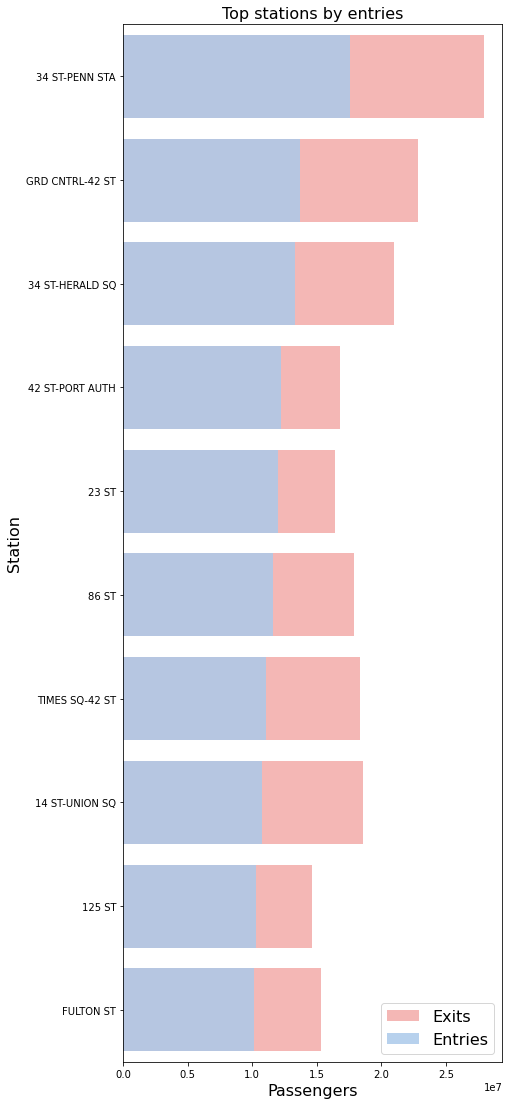

In [5]:
#aggregating and plotting dataset
entries_top=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_top,"Top stations by entries","entries_top");

Almost each station of this Top 10 plot is located at Manhatten, in which are concentrated places of work and a lot of tourists.






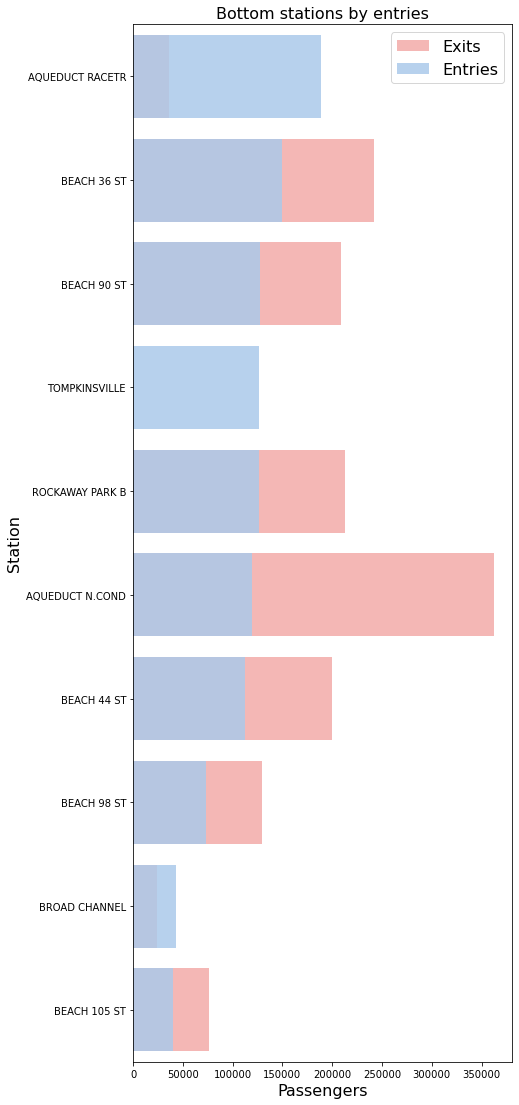

In [6]:
#aggregating and plotting dataset
entries_bottom=df.groupby("station").agg("sum").sort_values(by="entries_abs",ascending=False).iloc[:-1].tail(10)
plot_eda(entries_bottom,"Bottom stations by entries","entries_bottom");

These stations are mostly located near zones with high seasonality, like beaches. That is the reason , they don't have a lot of passengers through the year.

##### Getting top and bottom ten station by passengers amount exits.

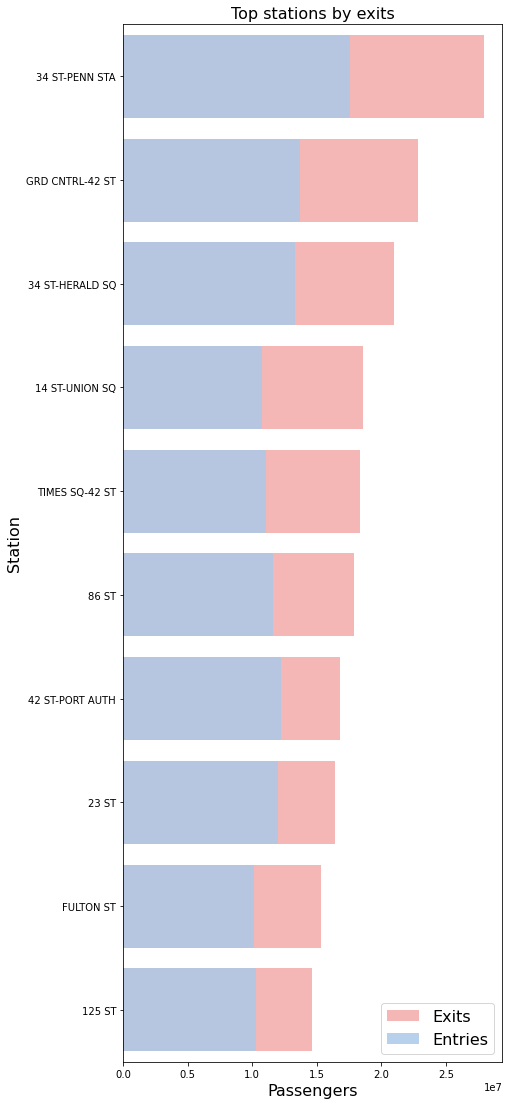

In [7]:
exits_top=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_top,"Top stations by exits","exits_top");

This list is almost the same as top 10 entries station. Which is understandable - thay located in the most popular areas.

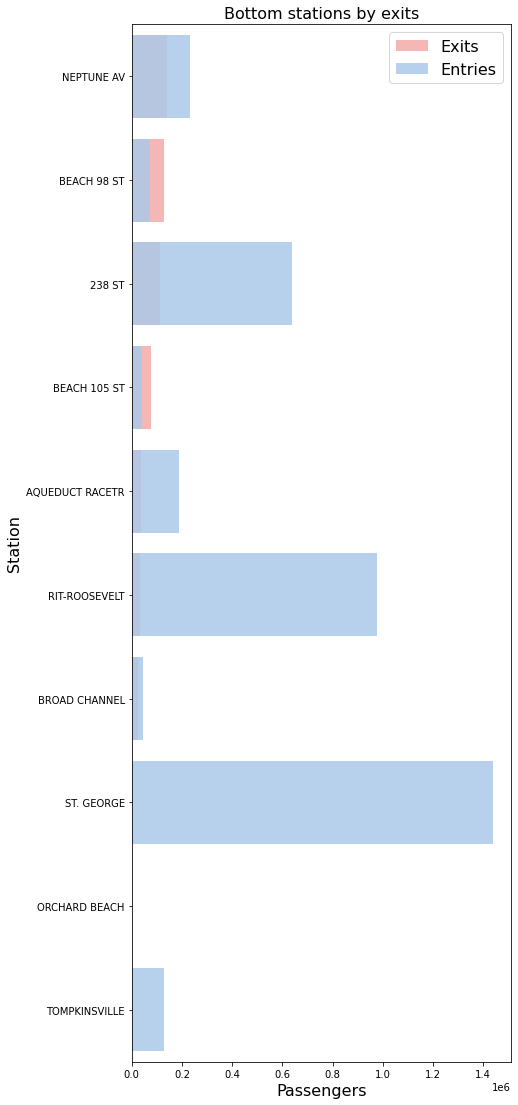

In [8]:
exits_bottom=df.groupby("station").agg("sum").sort_values(by="exits_abs",ascending=False).tail(10)
plot_eda(exits_bottom,"Bottom stations by exits","exits_bottom");

Almost all of the stations with abnormal entrie/exit balance are either a hubs, where people walks in to get to another transport or rarely used because of their's location. For exmple, St George station is a ferry, railway, bus, and park and ride transit center, so all the people walks in through it, but exits are carried out through other stations.

##### Top mean amount of people per line daily.

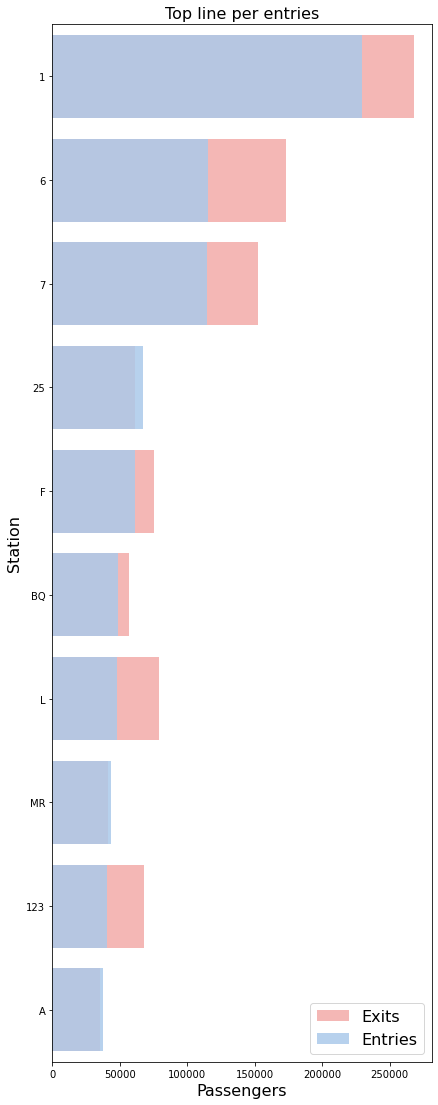

In [9]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=False).head(10)
plot_eda(entries_line,"Top line per entries","line_top");

Top 3 of these lines, are going either to or through Manhatten, that is why they are in very high demand. 

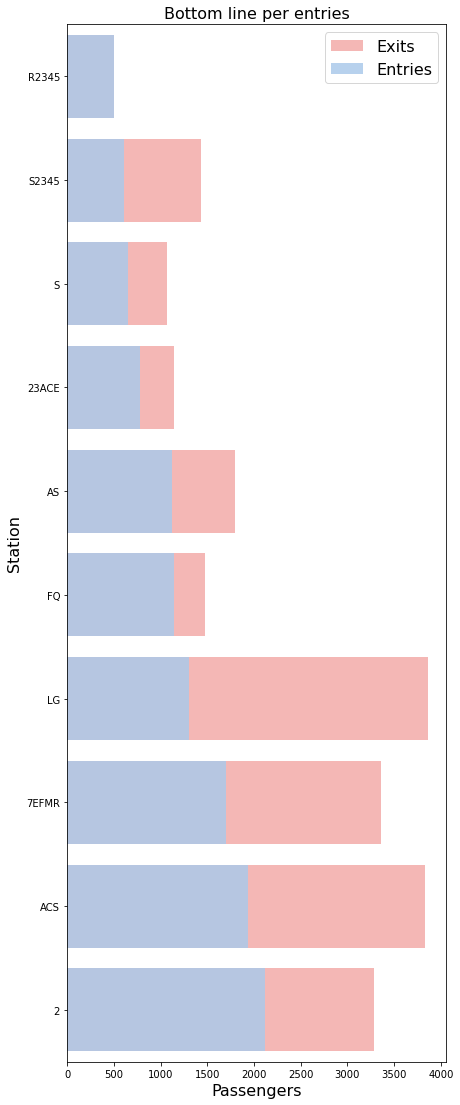

In [10]:
entries_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="entries_abs",ascending=True).head(10)
plot_eda(entries_line,"Bottom line per entries","line_bottom");

These "almost empty" lines are basically transit stations named after all lines it is connected to. That is the reason of abnormal load number. This problem won't affect out modeling process, so there is no reason to spend out time on it.

##### Top mean amount of people per line daily

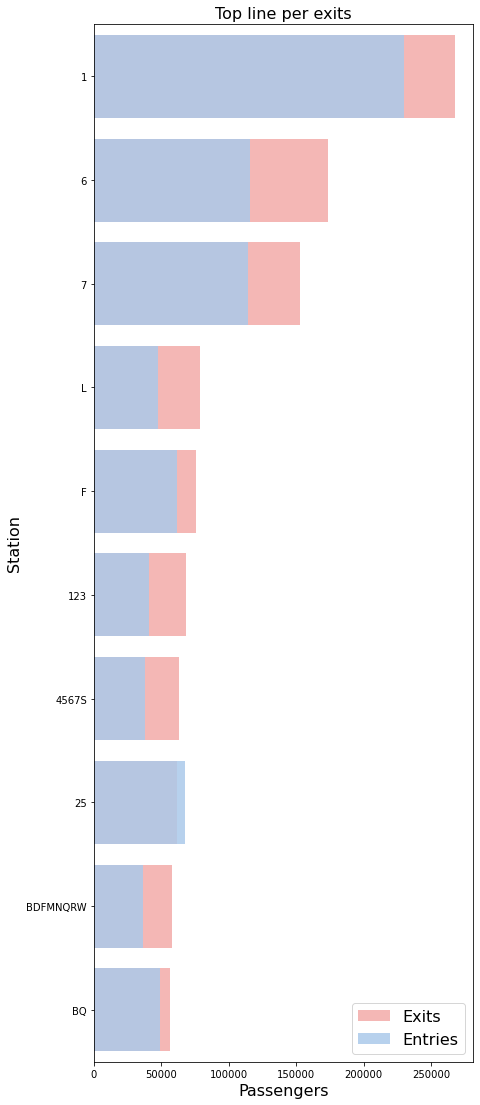

In [11]:
exits_line_top=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=False).head(10)
plot_eda(exits_line_top,"Top line per exits","line_top_exits");

Similarly to entries, almost all of the exits Top-10 stations are located or goes through Manhattan.

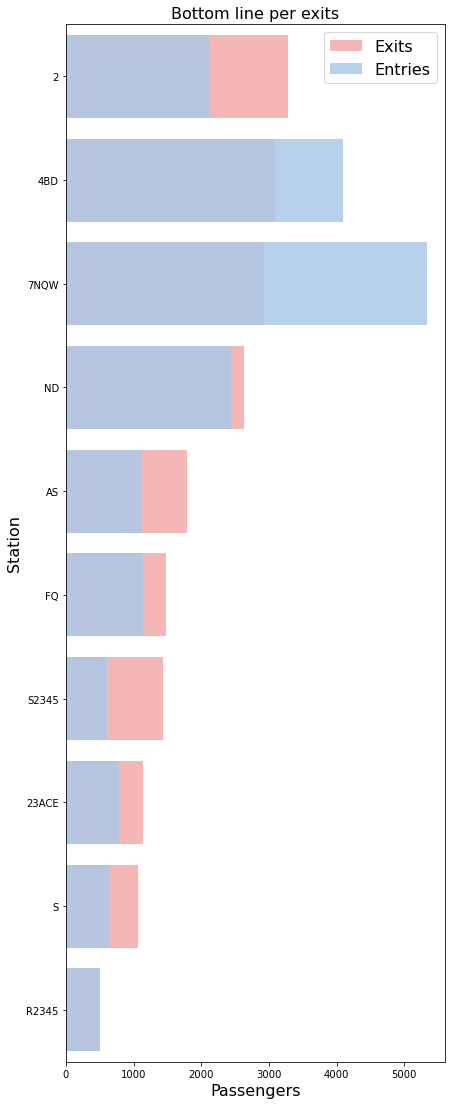

In [12]:
exits_line=df.groupby([df.index.floor("d"),"linename"]).sum().groupby("linename").mean().sort_values(by="exits_abs",ascending=False).tail(10)
plot_eda(exits_line,"Bottom line per exits","line_bottom_exits");

Bottom line load for both exits and entries is basically can be explained by cases where transit station get named after all lines it is connected to.  For example "23ACE" - is a single station, that connects lines 2,3,A,C and E. And despite huge passenger traffic, not so many people may using it for entries/exits from the street. This problem will not affect our modeling, so there is no reason to spend time on fixing.

##### Amount of people per day for the whole subway

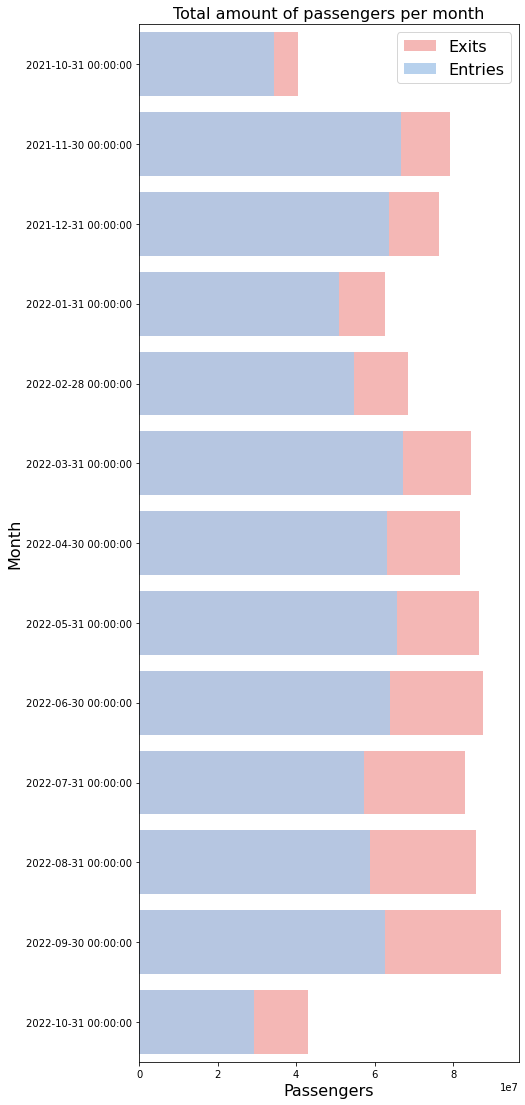

In [13]:
plot_eda(df.resample("M").sum().sort_index(),"Total amount of passengers per month","subway_amount","Month");


Most loaded are September and least loaded are October and November.

##### Subway load per weekday

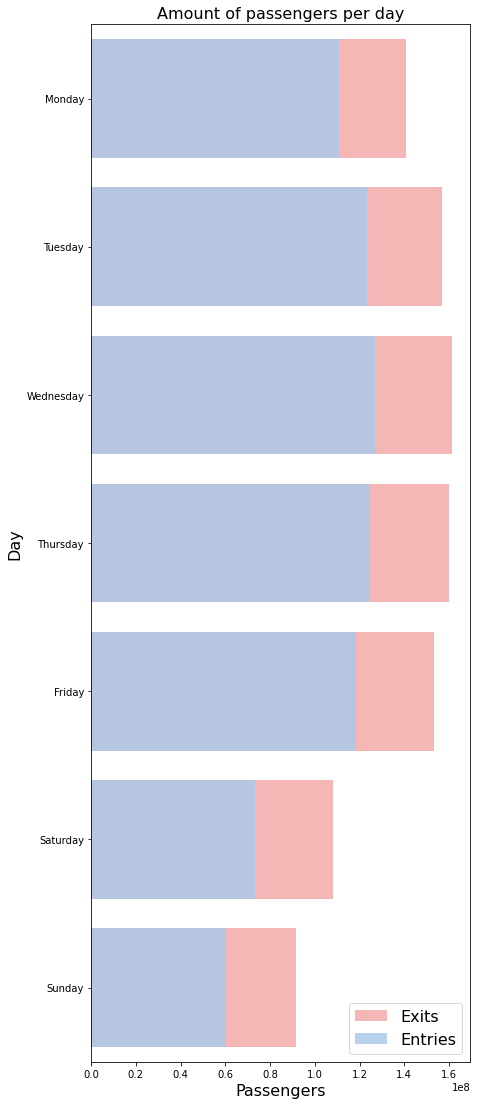

In [14]:
cats = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
by_day=df.groupby("weekday").sum().sort_index()
by_day['name_sort'] = by_day.index.map(cats)
plot_eda(by_day.sort_values(by="name_sort"),"Amount of passengers per day","Day_name","Day");

The subway load increases starting from monday, peaks on wednesday and after that starts decreasing slowly.

##### Total amount of entries and exits annually

In [15]:
print(f'Total amount of entries per year: {df["entries_abs"].sum()}')

Total amount of entries per year: 738115615


In [16]:
print(f'Total amount of exits per year: {df["exits_abs"].sum()}')

Total amount of exits per year: 971819557


We can see a significant difference between exits and entries numbers. It can be explained by wide variety of reasons. 
The most substantial is probably data from incorrect turnstiles. As we could see earlier - datasets contain some amount of errors and not all of them can be easily recognised and fixed. In addition to that, part of that difference is due to fare evading passengers, who sneacks into the subway avoiding payment process. According to MTA statisticks, almost 13 percent of passengers skipping the fee, which leads to almost half of a billion $USD of lost income. These people are not counted on entrance, but are counted on exits.






##### Annual NYC subway entries

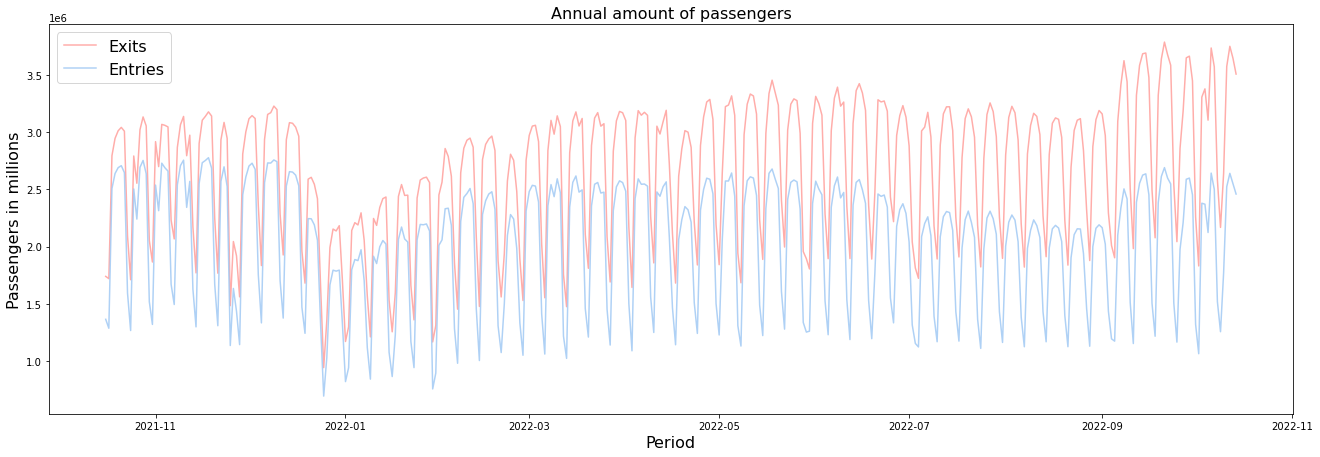

In [17]:
f, ax = plt.subplots(figsize=(18, 6))
f.tight_layout()
# Plot
kwargs = {'alpha':0.85}
sns.set_color_codes("pastel")
#Creating plot for both exits and exits. Using alpha parameter to set level of transparency
sns.lineplot(y="exits_abs", x=df.groupby(df.index.floor("d")).sum()[["exits_abs"]].index, data=df.groupby(df.index.floor("d")).sum()[["exits_abs"]],label="Exits", color="r", **kwargs,ax=ax)
sns.lineplot(y="entries_abs", x=df.groupby(df.index.floor("d")).sum()[["entries_abs"]].index, data=df.groupby(df.index.floor("d")).sum()[["entries_abs"]],label="Entries", color="b",**kwargs)
#Setting labels
ax.set_title("Annual amount of passengers",fontsize=16)
ax.set_xlabel('Period', fontsize = 16)
ax.set_ylabel("Passengers in millions", fontsize = 16)
#Showing legend
ax.legend(fontsize = 16)
#Saving plot   
plt.savefig(f"../resources/annual_combined.jpg",bbox_inches="tight");


On this plots we can see, how load is distributed through the year with a day size step. For each week there are noticable peacks for Wednesdays and low points for Sundays. Plot shows seasonal fluctuations, with high point in September and low in December. Despite the big amount of tourists coming to the city - New Year time shows the lowest load levels.